In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from IPython.display import display

from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [82]:
# reading the data

df = pd.read_csv('pepsico.csv')
df

,Study Number,Sample ID,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Difference From Fresh,Storage Conditions,Packaging Stabilizer Added,Transparent Window in Package,Processing Agent Stability Index,Preservative Added,Moisture (%),Residual Oxygen (%),Hexanal (ppm)
0,1310186,1310186-1,D,NaN,C,0.0,0.0,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN
1,1310186,1310186-1,D,NaN,C,10.0,0.0,NaN,NaN,NaN,16.2,NaN,1.56,2.87,0.10
2,1310186,1310186-1,D,NaN,C,14.0,0.0,NaN,NaN,NaN,16.2,NaN,1.64,2.95,0.10
3,1310186,1310186-1,D,NaN,C,16.0,3.3,NaN,NaN,NaN,16.0,NaN,1.60,7.13,0.09
4,1310186,1310186-1,D,NaN,C,18.0,2.7,NaN,NaN,NaN,16.0,NaN,1.70,12.73,0.47
5,1310746,1310746-1,E,C,C,0.0,0.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN
6,1310746,1310746-1,E,C,C,5.0,34.0,NaN,NaN,NaN,16.0,NaN,2.34,12.36,0.05
7,1310746,1310746-1,E,C,C,11.0,22.0,NaN,NaN,NaN,16.0,NaN,2.13,16.48,2.00
8,1310746,1310746-1,E,C,C,13.0,44.0,NaN,NaN,NaN,16.0,NaN,2.31,16.85,2.00
9,1310746,1310746-1,E,C,C,15.0,50.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN


In [3]:
# To see the testing dataset profiling
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,749
Total Missing (%),25.3%
Total size in memory,87.9 KiB
Average record size in memory,120.1 B
Numeric,7
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:
train = df
train.shape

(749, 15)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 15 columns):
Study Number                        749 non-null int64
Sample ID                           749 non-null object
Product Type                        749 non-null object
Base Ingredient                     640 non-null object
Process Type                        749 non-null object
Sample Age (Weeks)                  749 non-null float64
Difference From Fresh               749 non-null float64
Storage Conditions                  455 non-null object
Packaging Stabilizer Added          467 non-null object
Transparent Window in Package       102 non-null object
Processing Agent Stability Index    749 non-null float64
Preservative Added                  269 non-null object
Moisture (%)                        513 non-null float64
Residual Oxygen (%)                 420 non-null float64
Hexanal (ppm)                       289 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usa

Drop columns with over 30% missing data. That is below 524 non-null object.

In [6]:
# removing the Storage Conditions column
train = train.drop(['Storage Conditions'], axis = 1)

In [7]:
# removing the Packaging Stabilizer Added column
train = train.drop(['Packaging Stabilizer Added'], axis = 1)

In [8]:
# removing the Transparent Window in Package column
train = train.drop(['Transparent Window in Package'], axis = 1)

In [9]:
# removing the Preservative Added column
train = train.drop(['Preservative Added'], axis = 1)

In [10]:
# removing the Moisture (%) column
train = train.drop(['Moisture (%)'], axis = 1)

In [11]:
# removing the Residual Oxygen (%) column
train = train.drop(['Residual Oxygen (%)'], axis = 1)

In [12]:
# removing the Hexanal (ppm) column
train = train.drop(['Hexanal (ppm)'], axis = 1)

In [13]:
# removing the Study Number column
train = train.drop(['Study Number'], axis = 1)

In [14]:
# removing the Sample ID column
train = train.drop(['Sample ID'], axis = 1)

In [15]:
train.head()

,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Difference From Fresh,Processing Agent Stability Index
0,D,NaN,C,0.0,0.0,16.2
1,D,NaN,C,10.0,0.0,16.2
2,D,NaN,C,14.0,0.0,16.2
3,D,NaN,C,16.0,3.3,16.0
4,D,NaN,C,18.0,2.7,16.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 6 columns):
Product Type                        749 non-null object
Base Ingredient                     640 non-null object
Process Type                        749 non-null object
Sample Age (Weeks)                  749 non-null float64
Difference From Fresh               749 non-null float64
Processing Agent Stability Index    749 non-null float64
dtypes: float64(3), object(3)
memory usage: 35.2+ KB


In [17]:
print(train.isnull().sum())

Product Type                          0
Base Ingredient                     109
Process Type                          0
Sample Age (Weeks)                    0
Difference From Fresh                 0
Processing Agent Stability Index      0
dtype: int64


In [18]:
train['Base Ingredient'].fillna(train['Base Ingredient'].mode()[0], inplace = True)

In [19]:
print(train.isnull().sum())

Product Type                        0
Base Ingredient                     0
Process Type                        0
Sample Age (Weeks)                  0
Difference From Fresh               0
Processing Agent Stability Index    0
dtype: int64


In [20]:
train.columns

Index(['Product Type', 'Base Ingredient', 'Process Type', 'Sample Age (Weeks)',
       'Difference From Fresh', 'Processing Agent Stability Index'],
      dtype='object')

In [21]:
train.corr()

,Sample Age (Weeks),Difference From Fresh,Processing Agent Stability Index
Sample Age (Weeks),1.000000,0.365211,0.145576
Difference From Fresh,0.365211,1.000000,-0.039893
Processing Agent Stability Index,0.145576,-0.039893,1.000000


In [22]:
# getting their shapes
print("Shape of train:", train.shape)

Shape of train: (749, 6)


In [23]:
# Convert to a Classification task
clean_data = train.copy() # New data frame to avoid confusion 
clean_data['Difference From Fresh'] = (clean_data['Difference From Fresh'] > 20) * 1

In [24]:
y = clean_data['Difference From Fresh']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Difference From Fresh, dtype: int32

In [25]:
# removing the Difference From Fresh column
train = train.drop(['Difference From Fresh'], axis = 1)

In [26]:
train.head()

,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Processing Agent Stability Index
0,D,A,C,0.0,16.2
1,D,A,C,10.0,16.2
2,D,A,C,14.0,16.2
3,D,A,C,16.0,16.0
4,D,A,C,18.0,16.0


In [27]:
X = train.iloc[:,0:]
X.head()

,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Processing Agent Stability Index
0,D,A,C,0.0,16.2
1,D,A,C,10.0,16.2
2,D,A,C,14.0,16.2
3,D,A,C,16.0,16.0
4,D,A,C,18.0,16.0


In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in X:
    # Compare if the dtype is object
    if X[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
         X[col]=le.fit_transform(X[col])

In [29]:
X.head()

,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Processing Agent Stability Index
0,3,0,2,0.0,16.2
1,3,0,2,10.0,16.2
2,3,0,2,14.0,16.2
3,3,0,2,16.0,16.0
4,3,0,2,18.0,16.0


In [30]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [31]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [32]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (599, 5)
Shape of X_test:  (150, 5)
Shape of y_train:  (599,)
Shape of y_test:  (150,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can predict using our test set:

In [34]:
predict = LR.predict(X_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
predict_prob = LR.predict_proba(X_test)
predict_prob

array([[0.71525848, 0.28474152],
       [0.72855626, 0.27144374],
       [0.73760347, 0.26239653],
       [0.71391897, 0.28608103],
       [0.62518084, 0.37481916],
       [0.66609168, 0.33390832],
       [0.75974291, 0.24025709],
       [0.68339189, 0.31660811],
       [0.62593298, 0.37406702],
       [0.61478967, 0.38521033],
       [0.69581335, 0.30418665],
       [0.67221503, 0.32778497],
       [0.61290728, 0.38709272],
       [0.65334107, 0.34665893],
       [0.67851449, 0.32148551],
       [0.70601698, 0.29398302],
       [0.74875061, 0.25124939],
       [0.59397833, 0.40602167],
       [0.73760347, 0.26239653],
       [0.60108846, 0.39891154],
       [0.66107994, 0.33892006],
       [0.7025438 , 0.2974562 ],
       [0.68439306, 0.31560694],
       [0.66285693, 0.33714307],
       [0.68801498, 0.31198502],
       [0.66609168, 0.33390832],
       [0.7025438 , 0.2974562 ],
       [0.63948504, 0.36051496],
       [0.71963228, 0.28036772],
       [0.72692929, 0.27307071],
       [0.

<h2 id="evaluation">Evaluation</h2>

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [36]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predict)

0.78

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predict, labels=[1,0]))

[[  0  33]
 [  0 117]]


Confusion matrix, without normalization
[[  0  33]
 [  0 117]]


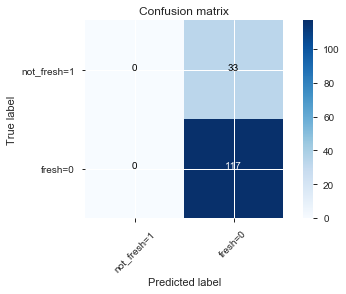

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not_fresh=1','fresh=0'],normalize= False,  title='Confusion matrix')

The model correctly predicted 117 samples as fresh. 
It wrongly predicts 33 samples as fresh.
The model is good only when predicting freshness of samples

In [39]:
print("Training Accuracy :", LR.score(X_train, y_train))

print("Validation Accuracy :", LR.score(X_test, y_test))

print (classification_report(y_test, predict))

Training Accuracy : 0.8130217028380634
Validation Accuracy : 0.78
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        33

    accuracy                           0.78       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.61      0.78      0.68       150



In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, predict_prob)

0.535812988612194

### Let us use other classifiers to see if we can get a better accuracy

### Random Forest Classifer

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
rfc_train_score = rfc.score(X_train, y_train)


print("Training Accuracy :", rfc.score(X_train, y_train))

print("Validation Accuracy :", rfc.score(X_test, y_test))

cm = confusion_matrix(y_test, rfc_pred)
print(cm)

cr = classification_report(y_test, rfc_pred)
print(cr)

Training Accuracy : 0.9265442404006677
Validation Accuracy : 0.7133333333333334
[[98 19]
 [24  9]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       117
           1       0.32      0.27      0.30        33

    accuracy                           0.71       150
   macro avg       0.56      0.56      0.56       150
weighted avg       0.70      0.71      0.70       150



Text(0.5, 257.44, 'Predicted label')

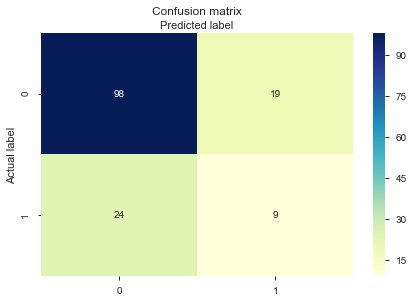

In [42]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
dtc_train = dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

dtc_train_score = dtc.score(X_train, y_train)
dtc_val_score = dtc.score(X_test, y_test)

print("Training Accuracy :", dtc.score(X_train, y_train))

print("Validation Accuracy :", dtc.score(X_test, y_test))

cm = confusion_matrix(y_test, dtc_pred)
print(cm)

cr = classification_report(y_test, dtc_pred)
print(cr)

Training Accuracy : 0.8547579298831386
Validation Accuracy : 0.7866666666666666
[[112   5]
 [ 27   6]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       117
           1       0.55      0.18      0.27        33

    accuracy                           0.79       150
   macro avg       0.68      0.57      0.57       150
weighted avg       0.75      0.79      0.74       150



In [44]:
#Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb_train = xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_train_score = xgb.score(X_train, y_train)
xgb_val_score = xgb.score(X_test, y_test)

print("Training Accuracy :", xgb.score(X_train, y_train))

print("Validation Accuracy :", xgb.score(X_test, y_test))

cm = confusion_matrix(y_test, xgb_pred)
print(cm)

cr = classification_report(y_test, xgb_pred)
print(cr)

Training Accuracy : 0.8614357262103506
Validation Accuracy : 0.7866666666666666
[[115   2]
 [ 30   3]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       117
           1       0.60      0.09      0.16        33

    accuracy                           0.79       150
   macro avg       0.70      0.54      0.52       150
weighted avg       0.75      0.79      0.72       150



Text(0.5, 257.44, 'Predicted label')

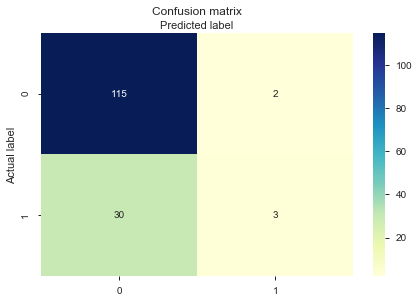

In [45]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

print("Training Accuracy :", logreg.score(X_train, y_train))

print("Validation Accuracy :", logreg.score(X_test, y_test))

cm = confusion_matrix(y_test, logreg_pred)
print(cm)

cr = classification_report(y_test, logreg_pred)
print(cr)

Training Accuracy : 0.8163606010016694
Validation Accuracy : 0.7733333333333333
[[116   1]
 [ 33   0]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       117
           1       0.00      0.00      0.00        33

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.61      0.77      0.68       150



Text(0.5, 257.44, 'Predicted label')

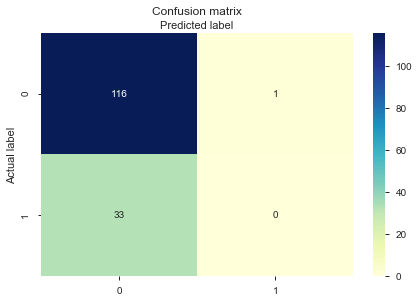

In [47]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
# Gaussian Naive Bayes
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_pred = gaussian.predict(X_test)

print("Training Accuracy :", gaussian.score(X_train, y_train))

print("Validation Accuracy :", gaussian.score(X_test, y_test))

cm = confusion_matrix(y_test, gaussian_pred)
print(cm)

cr = classification_report(y_test, gaussian_pred)
print(cr)

Training Accuracy : 0.8013355592654424
Validation Accuracy : 0.74
[[109   8]
 [ 31   2]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       117
           1       0.20      0.06      0.09        33

    accuracy                           0.74       150
   macro avg       0.49      0.50      0.47       150
weighted avg       0.65      0.74      0.68       150



In [49]:
# Support Vector Classifier(SVC)
from sklearn.svm import SVC 

svc = SVC(gamma='auto')
svc = svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("Training Accuracy :", svc.score(X_train, y_train))

print("Validation Accuracy :", svc.score(X_test, y_test))

cm = confusion_matrix(y_test, svc_pred)
print(cm)

cr = classification_report(y_test, svc_pred)
print(cr)

Training Accuracy : 0.8280467445742905
Validation Accuracy : 0.78
[[115   2]
 [ 31   2]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       117
           1       0.50      0.06      0.11        33

    accuracy                           0.78       150
   macro avg       0.64      0.52      0.49       150
weighted avg       0.72      0.78      0.71       150



In [50]:
# K-Nearest Neighbors
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("Training Accuracy :", knn.score(X_train, y_train))

print("Validation Accuracy :", knn.score(X_test, y_test))

cm = confusion_matrix(y_test, knn_pred)
print(cm)

cr = classification_report(y_test, knn_pred)
print(cr)

Training Accuracy : 0.8848080133555927
Validation Accuracy : 0.74
[[103  14]
 [ 25   8]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       117
           1       0.36      0.24      0.29        33

    accuracy                           0.74       150
   macro avg       0.58      0.56      0.57       150
weighted avg       0.71      0.74      0.72       150



Text(0.5, 257.44, 'Predicted label')

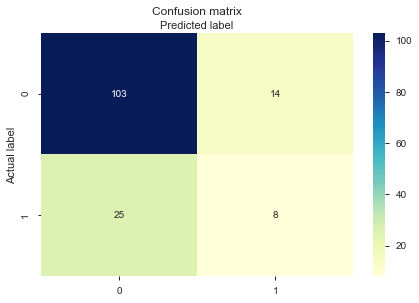

In [51]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[0.12 0.04 0.03 0.59 0.22]


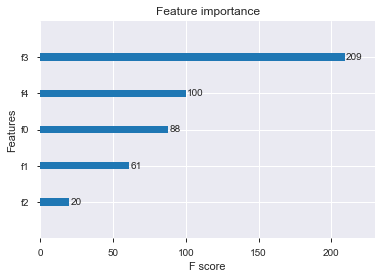

In [52]:
# fit an Extra Trees model to the data
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
# display the relative importance of each attribute
print(model.feature_importances_)
#plot feature importance
#This shows the importance of each features in determining the model
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_train)
pyplot.show()

In [53]:
#Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb_train = xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_train_score = xgb.score(X_train, y_train)
xgb_val_score = xgb.score(X_test, y_test)

print("Training Accuracy :", xgb.score(X_train, y_train))

print("Validation Accuracy :", xgb.score(X_test, y_test))

cm = confusion_matrix(y_test, xgb_pred)
print(cm)

cr = classification_report(y_test, xgb_pred)
print(cr)

Training Accuracy : 0.8614357262103506
Validation Accuracy : 0.7866666666666666
[[115   2]
 [ 30   3]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       117
           1       0.60      0.09      0.16        33

    accuracy                           0.79       150
   macro avg       0.70      0.54      0.52       150
weighted avg       0.75      0.79      0.72       150



Text(0.5, 257.44, 'Predicted label')

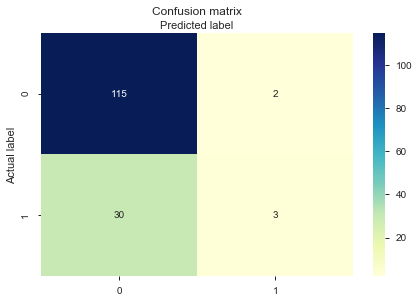

In [54]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
# Spot Check Algorithms
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression(C=0.01, solver='liblinear')))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models: 
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,)
    results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

RFC: 0.841356 (0.047461)


In [56]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['LR','XGB', 'KNN','DTC','NB','SVM','RFC']
models=[LogisticRegression(solver='liblinear', multi_class='ovr'),
        XGBClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0), GaussianNB(),SVC(gamma='auto'),RandomForestClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

,CV Mean,Std
LR,0.797207,0.091024
XGB,0.806541,0.100937
KNN,0.770541,0.099033
DTC,0.806541,0.098621
NB,0.770505,0.090590
SVM,0.806541,0.101639
RFC,0.762432,0.075418


In [57]:
prediction = rfc.predict(X_test)

In [58]:
predict_rfc =rfc.predict_proba(X)
predict_rfc # result in array

array([[1.  , 0.  ],
       [0.87, 0.13],
       [1.  , 0.  ],
       ...,
       [0.9 , 0.1 ],
       [0.2 , 0.8 ],
       [1.  , 0.  ]])

In [59]:
prediction =pd.DataFrame(predict_rfc,columns=['Class_1','Class_2'])
print(prediction.head())

    Class_1   Class_2
0  1.000000  0.000000
1  0.866667  0.133333
2  1.000000  0.000000
3  0.962500  0.037500
4  1.000000  0.000000


In [62]:
y1=df.iloc[:,:0:1].join(prediction)

In [63]:
y1 

,Class_1,Class_2
0,1.000000,0.000000
1,0.866667,0.133333
2,1.000000,0.000000
3,0.962500,0.037500
4,1.000000,0.000000
5,1.000000,0.000000
6,0.208095,0.791905
7,0.441190,0.558810
8,0.281667,0.718333
9,0.000000,1.000000


In [65]:
Pred_sample = rfc.predict(X)
Pred_sample 

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [66]:
Pfinal = pd.DataFrame(Pred_sample)

In [67]:
Pfinal

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [78]:
Pfinal.to_csv(r'C:\Users\Amy\Downloads\Prediction.csv')